# Boston Housing Price Prediction

## Description

The Boston Housing Dataset is a widely used dataset in machine learning and statistics. It contains information about housing in the boston area and is commonly used for regression tasks. The dataset includes 506 samples with 13 feature variables and the target variable representing the median value of owner-occupied homes (in thousands of dollars).

### The features in the dataset are as follows:

- **CRIM** : Crime rate per capita.

- **ZN** : Proportion of residential land zoned for large lots.

- **INDUS** : Proportion of non-retail business acres per town.

- **CHAS** : Charles River dummy variable (1 if the house is next to the river, 0 otherwise).

- **NOX** : Nitrogen oxide concentration (parts per 10 million).

- **RM** : Average number of rooms per dwelling.

- **AGE** : Proportion of homes built before 1940.

- **DIS** : Weighted distance to employment centers.

- **RAD** : Index of accessibility to radial highways.

- **TAX** : Property tax rate per $10,000.

- **PTRATIO** : Pupil-teacher ratio by town.

- **B** : Proportion of residents of African American descent (calculated as 1000(Bk - 0.63)^2).

- **LSTAT** : Percentage of lower status population.

The target variable **( PRICE )** represents the median value of homes in $1,000s. **The goal is to predict the housing price based on these features.**

### 

### Import Necessary Libraries

In [6]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

### 

## Step 1: Load the Dataset

In [9]:
df = pd.read_csv('Boston_Housing_Dataset.csv')

In [10]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Step 2: Exploratory Data Analysis (EDA)

In [12]:
df.shape

(506, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


### Data Cleaning

In [15]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### 

## Visualization

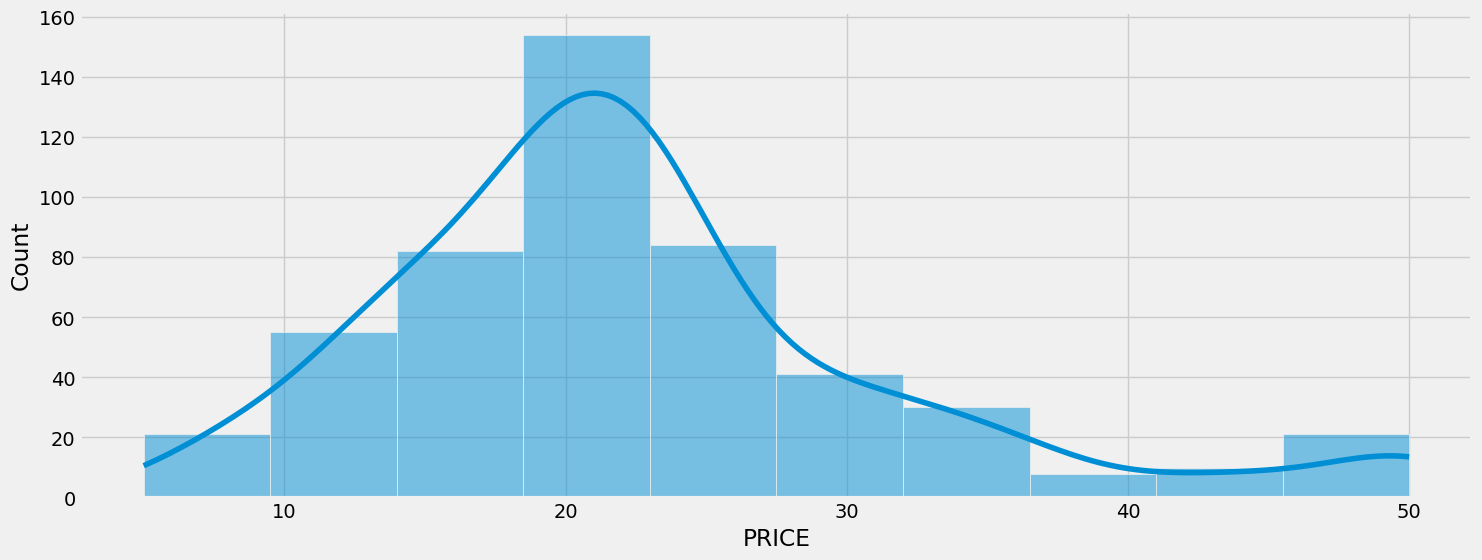

In [20]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(16,6))
sns.histplot(df['PRICE'], bins=10, kde=True) #kde stands for Kernel density
plt.show()

### Observations
- On an average median price moves around 22K USD
- Distribuution is slightly right skewed and there are close to 20-30 houses in the price range of 40-50K USD

### 

## Checking average number of rooms for houses with price > 45k USD

In [24]:
select_house_more_than_45KUSD = df['PRICE']>45
df[select_house_more_than_45KUSD]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7


In [25]:
df[select_house_more_than_45KUSD]['RM'].mean()

7.608772727272726

### Observations
- Key takeaway here is that number of rooms per house seems to be key driving factor for house prices.

### 

## Correlation Matrix

<Axes: >

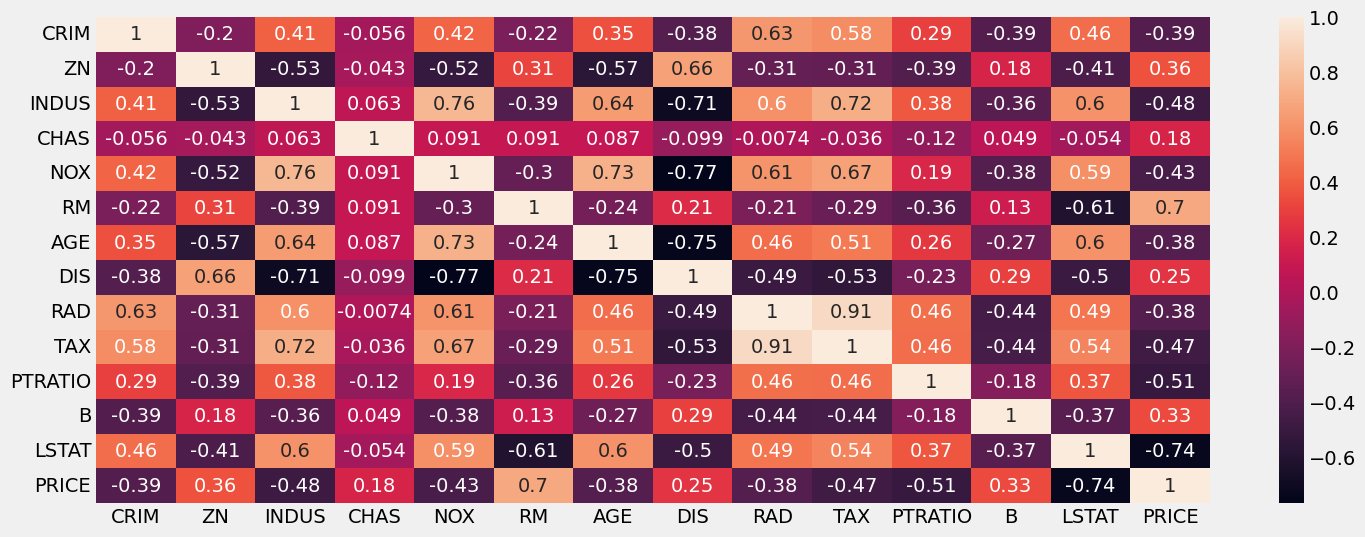

In [29]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

### Observations

- From the above correlation plot we can see that **PRICE** is strongly correlated to **LSTAT**, **RM**.
- **RAD** and **TAX** are strongly correlated.

### 

## Check for Multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# Function to detect Multicollinearity
def vif_cal(features):
    x=df[features]
    x['Intercept'] = 1
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif = vif[vif['Variables']!='Intercept']
    return vif

In [35]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [36]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [37]:
vif_cal(features).sort_values('VIF', ascending=False)

,Variables,VIF
9,TAX,9.008554
8,RAD,7.484496
4,NOX,4.393720
2,INDUS,3.991596
7,DIS,3.955945
6,AGE,3.100826
12,LSTAT,2.941491
1,ZN,2.298758
5,RM,1.933744
10,PTRATIO,1.799084


### Observations

1. TAX (9.01) and RAD (7.48) have high VIFs, suggesting substantial multicollinearity with other predictors. 
2. Other variables like NOX (4.39), INDUS (3.99), DIS (3.96), and AGE (3.10) have moderate VIFs, implying some multicollinearity but not severe.
3. Variables like CHAS (1.07) and B (1.35) have low VIFs, indicating minimal multicollinearity.

### Conclusion
Drop **TAX** or **RAD** column to avoid Multicollinearity.

### 

## Step 3: Model Building

In [42]:
# Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Prepare the Data

In [44]:
X = df.drop(['PRICE','RAD'],axis=1)

In [45]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [46]:
y = df['PRICE']

In [47]:
y = pd.DataFrame(y)

In [48]:
y

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Split the data into train and test sets

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=42)

In [51]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,666.0,20.2,109.85,23.27


In [52]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,666.0,20.2,100.19,16.22


### Scaling the Data

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [55]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [56]:
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [57]:
x_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

### Training the Model

In [59]:
lr = LinearRegression()

In [60]:
lr

LinearRegression()

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

## Step 4: Evaluating the Model

In [63]:
pred = lr.predict(x_test)

In [64]:
pred

array([[28.52699545],
       [36.3284252 ],
       [19.0094647 ],
       [25.52345322],
       [18.18974051],
       [23.72470191],
       [17.50822805],
       [15.31893832],
       [21.92135453],
       [21.28207654],
       [24.34410643],
       [18.24750012],
       [-6.22577985],
       [22.4724788 ],
       [19.01832144],
       [25.5112776 ],
       [18.72368674],
       [ 4.9959998 ],
       [39.82568843],
       [16.99989936],
       [27.017543  ],
       [29.55434104],
       [11.41315789],
       [24.77313119],
       [17.43414674],
       [14.93068999],
       [23.73706055],
       [14.44227631],
       [22.40454908],
       [20.00559078],
       [21.88952818],
       [25.17691071],
       [25.17850193],
       [17.63781952],
       [15.66801897],
       [18.20376424],
       [31.10415429],
       [19.66687403],
       [24.12334785],
       [25.06599705],
       [14.57682083],
       [30.47001245],
       [41.38639371],
       [18.1894102 ],
       [27.5277813 ],
       [16

## Performance Metrics

### MSE

In [67]:
mse = mean_squared_error(pred,y_test)
print('MSE:',mse)

MSE: 23.225651753463115


### RMSE

In [69]:
rmse = np.sqrt(mse)
print('RMSE:',rmse)

RMSE: 4.81929992358466


In [70]:
error = rmse/y.mean()*100
print("Error:", error[0])
print("Accuracy:", 100-error[0])

Error: 21.38792591683481
Accuracy: 78.6120740831652


### R2

In [72]:
r_squared1 = lr.score(x_test, y_test)
print('R2:',r_squared1*100)

R2: 68.8301075449093


### Adjusted R2

In [74]:
n = x_test.shape[0]
p = x_test.shape[1]

In [75]:
# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r_squared1) * (n - 1) / (n - p - 1)
print('Adjusted R2:',adjusted_r2*100)

Adjusted R2: 66.13918157756333


### Actual vs Predicted Plot

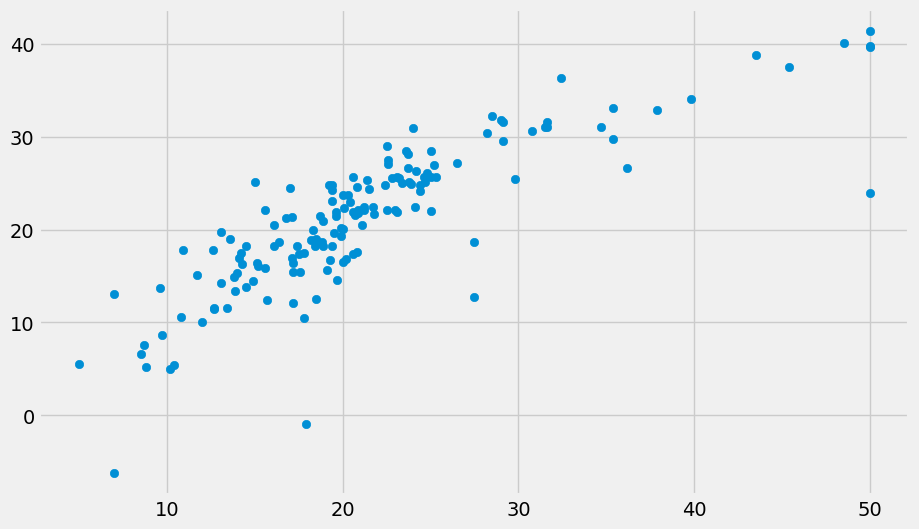

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)
plt.show()

# Conclusion
- This project successfully analyzed and modeled housing prices in Boston, identifying significant features like **RM**, **LSTAT**, etc that impact property values.
- Using **Linear Regression** we achieved a reasonable prediction accuracy, with performance metrics such as **MSE**, **RMSE**, **R2** & **Adjusted-R2** reflecting the model's effectiveness.